# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [5]:
import pandas as pd
import numpy as np

def montecarlo(f, N, a, b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

N = [10, 100, 1000, 10000, 100000] 
table = pd.DataFrame(columns=["Aproximación f1","Error f1", "Aproximación f2","Error f2"], index=N)

def f1(x):
    return np.exp(x)*np.log(x)

def f2(x):
    return np.sin(x)*np.log(x)


for i in N:
    table.loc[i,"Aproximación f1"] = montecarlo(f1, int(i), 1, 3)
    table.loc[i,"Aproximación f2"] = montecarlo(f2, int(i), 1, 3)
    
table["Error f1"] = np.abs(14.0275- table["Aproximación f1"])
table["Error f2"] = np.abs(0.869844- table["Aproximación f2"])
table

,Aproximación f1,Error f1,Aproximación f2,Error f2
10,4.064148,9.963352,0.897868,0.028024
100,13.553062,0.474438,0.853589,0.016255
1000,14.345326,0.317826,0.869499,0.000345
10000,13.896059,0.131441,0.873105,0.003261
100000,14.074816,0.047316,0.869799,0.000045


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return (x**2 + 2*y**2 <= -2*x + 8*y - 7)

N = [10, 100, 1000, 10000, 100000] 
table1 = pd.DataFrame(columns=["Aproximación","Error"], index=N)
for i in N:
    table1.loc[i,"Aproximación"] = montecarlo2(bernoulli, -2.5, 0.5, 0, 3, int(i))
    
table1


,Aproximación,Error
10,4.5,NaN
100,4.77,NaN
1000,4.581,NaN
10000,4.4433,NaN
100000,4.41495,NaN


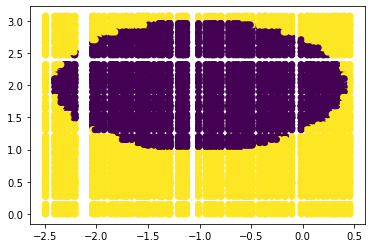

In [28]:
x = np.random.uniform(-2.5, 0.5, 100)
y = np.random.uniform(0, 3.1, 100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c=~bernoulli(X,Y))

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

**1. Valuación instrumentos financieros**

En finanzas matemáticas un problema frecuente es el valuar instrumentos financieros cuyos rendimientos son aleatorios. Por ejemplo los instrumentos de renta variable, las inversiones en la bolsa o los derivados, cuyos rendimientos dependen del comportamiento de una acción o de un bien como el oro o el petróleo.

En este particular caso se valúan opciones, una opción es un contrato entre dos personas para adquirir o vender un bien o un activo llamado subyacente a un precio y en una fecha fijados de antemano. A la fecha se le llama fecha de maduración y al precio se le conoce como precio de ejercicio. Si la opción es de compra se llama un call, si es de venta se llama un put.

En una opción siempre hay dos partes: por un lado, quien compra la opción y por otro quien la suscribe. El primero adquiere el derecho, pero no la obligación, de ejercer la opción en la fecha de maduración, en cambio, la contra-parte se obliga a cumplir el contrato, independientemente de o que convenga a sus intereses.

Aquí se utiliza la integración montecarlo para calcular una integral que arroja la valuación de una opción.

Referencia: http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf

https://dialnet.unirioja.es/descarga/articulo/4835801.pdf

https://dialnet.unirioja.es/descarga/articulo/7024384.pdf